In [1]:
import pybamm
import matplotlib.pyplot as plt
from electrode_coating.models import Newtonian

model = Newtonian()

#Add parameters
param = pybamm.ParameterValues(
    {
        "Pressure [Pa]": 2,
        "Yield stress [Pa]": 2,
        "Exponent parameter [t]": 3,
        "Coating gap [m]": 4,
        "Coating speed [m.s-1]": 10,
        "Newtionian viscosity [Pa]": 3,
        "Shear strain [s-1]": 1,
        "Integration constant 1": 1,
        "Integration constant 2": 1,
        "Power-law index": 1,

    }
)

sim = pybamm.Simulation(model, parameter_values=param)
sol = sim.solve([0, 1])

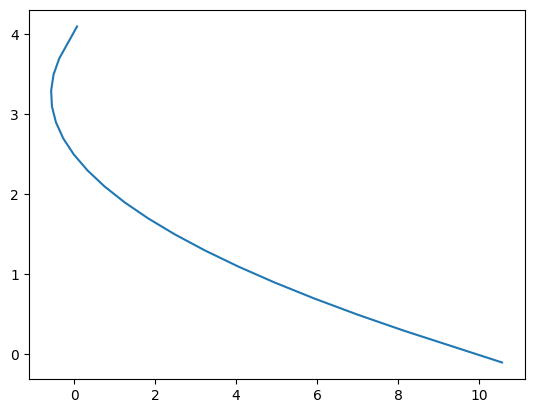

In [2]:
# Plot velocity profile
y = sol["y [m]"](t=0)
u = sol["Velocity [m.s-1]"](t=0)

plt.plot(u, y)

Text(0, 0.5, 'Coating thickness [m]')

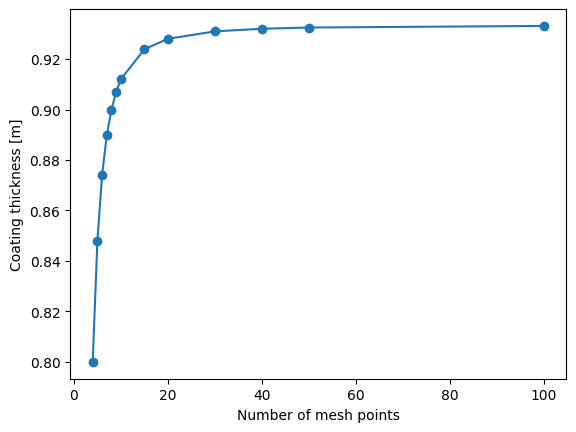

In [3]:
# Convergence plot
var_pts_list = [4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100]
y = model.variables["y [m]"]
thickness_list = []


for var_pts in var_pts_list:
    sim = pybamm.Simulation(model, parameter_values=param, var_pts={y: var_pts})
    sol = sim.solve([0, 1])
    thickness_list.append(sol["Coating thickness [m]"](t=0))

plt.plot(var_pts_list, thickness_list, "o-")
plt.xlabel("Number of mesh points")
plt.ylabel("Coating thickness [m]")